In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
np.random.seed(1)
random.seed(1)

In [222]:
train_df=pd.read_csv('/Users/junyakuramochi/Downloads/kaggle_HousePrices/input/train.csv')
test_df=pd.read_csv('/Users/junyakuramochi/Downloads/kaggle_HousePrices/input/test.csv')
submission=pd.read_csv('/Users/junyakuramochi/Downloads/kaggle_HousePrices/input/sample_submission.csv')

In [223]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [224]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [225]:
#RL→住宅低密度:1151
#RM→中密度住宅:218
#FV→フローティングビレッジ住宅:65
#RH→高密度住宅地:16
#C→商業用:10
train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

前処理

In [226]:
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)

In [227]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [228]:
all_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [229]:
categories=all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [230]:
#from sklearn.preprocessing import LabelEncoderでobject型を数値に変える
from sklearn.preprocessing import LabelEncoder

for cat in categories:
    le=LabelEncoder()
    print(cat)
    all_df[cat].fillna('missing',inplace=True)
    le=le.fit(all_df[cat])
    #元のデータに数値として戻す
    all_df[cat]=le.transform(all_df[cat])
    all_df[cat]=all_df[cat].astype('category')


MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [231]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [232]:
#学習データとテストデータに戻す｡
#salepriceが記載しているかしていないかで分ける｡
train_df_le=all_df[~all_df['SalePrice'].isnull()]
test_df_le=all_df[all_df['SalePrice'].isnull()]

In [233]:
import lightgbm as lgb

In [234]:
#クロスバリデーションで分ける
from sklearn.model_selection import KFold
folds=3
kf=KFold(n_splits=folds)

In [235]:
#lightgbmのパラメータ調整
lgbm_params={
    #今回は回帰分析で実行する
    'objective':'regression',
    'random_seed':1
}

In [236]:
#目的変数と説明変数に分ける
#説明変数
train_X=train_df_le.drop(['Id','SalePrice'],axis=1)
#目的変数
train_Y=train_df_le['SalePrice']

In [237]:
#HousePriceの評価は平均二乗誤差なので
from sklearn.metrics import mean_squared_error

LightGBMの実行

In [238]:
models=[]
rmses=[]
#out of fold
oof=np.zeros(len(train_X))

for train_index,valid_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    y_train=train_Y.iloc[train_index]
    X_valid=train_X.iloc[valid_index]
    y_valid=train_Y.iloc[valid_index]
    
    lgb_train=lgb.Dataset(X_train,y_train)
    lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)
    
    model_lgb=lgb.train(lgbm_params,
                                        lgb_train,
                                        valid_sets=lgb_eval,
                                       num_boost_round=100,
                                       early_stopping_rounds=20,
                                       verbose_eval=10,
                                       )
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    tmp_rmse=np.sqrt(mean_squared_error(np.log(y_valid),np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[valid_index]=y_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.57807e+09
[20]	valid_0's l2: 7.38516e+08
[30]	valid_0's l2: 5.93255e+08
[40]	valid_0's l2: 5.6061e+08
[50]	valid_0's l2: 5.48225e+08
[60]	valid_0's l2: 5.46182e+08
[70]	valid_0's l2: 5.51735e+08
Early stopping, best iteration is:
[55]	valid_0's l2: 5.45194e+08


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


0.12719558859476138
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 180923.739979
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.089e+09
[20]	valid_0's l2: 1.22218e+09
[30]	valid_0's l2: 1.03767e+09
[40]	valid_0's l2: 9.7989e+08
[50]	valid_0's l2: 9.47475e+08


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[60]	valid_0's l2: 9.27892e+08
[70]	valid_0's l2: 9.20973e+08
[80]	valid_0's l2: 9.1853e+08
[90]	valid_0's l2: 9.0149e+08
[100]	valid_0's l2: 8.97013e+08
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 8.96476e+08
0.14795399816677407
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 75
[LightGBM] [Info] Start training from score 182112.591376
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.80296e+09
[20]	valid_0's l2: 1.02271e+09
[30]	valid_0's l2: 8.68838e+08
[40]	valid_0's l2: 8.41872e+08
[50]	valid_0's l2: 8.35433e+08
[60]	valid_0's l2: 8.28083e+08
[70]	valid_0's l2: 8.25289e+08
[80]	valid_0's l2: 8.25043e+08
Early stopping, best itera

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


In [239]:
#平均rmseを求める
print(rmses)
print(sum(rmses)/len(rmses))

[0.12719558859476138, 0.14795399816677407, 0.1325997570084599]
0.1359164479233318


In [240]:
#データの可視化
actual_pred_df=pd.DataFrame({
    'actual':train_Y,
    'pred':oof
})

<AxesSubplot:>

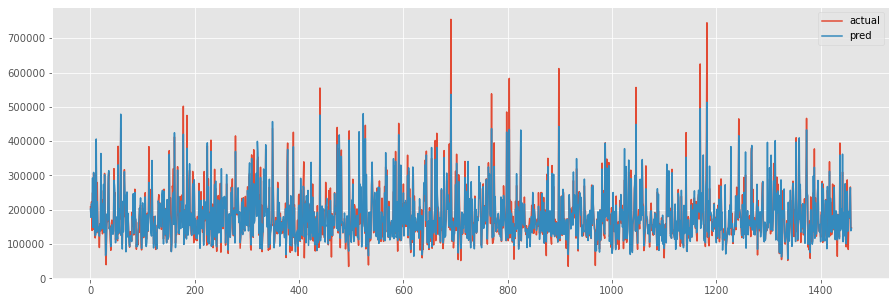

In [241]:
actual_pred_df.plot(figsize=(15,5))

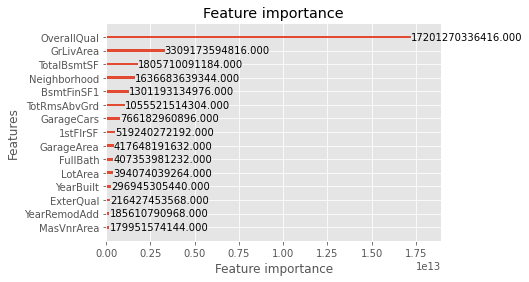

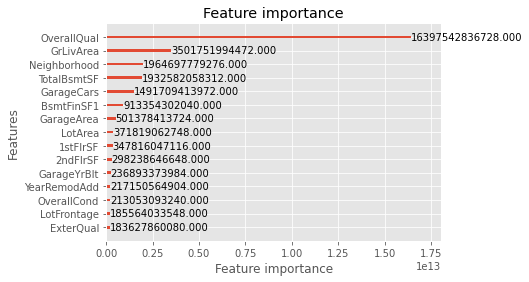

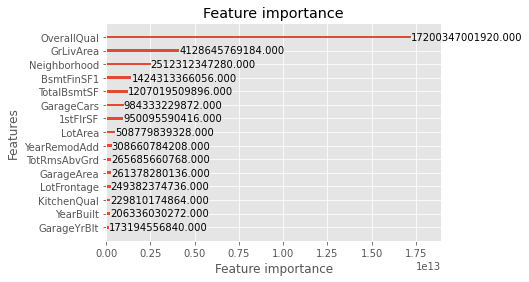

In [242]:
for model in models:
    lgb.plot_importance(model,importance_type='gain',max_num_features=15)
#ovalallqualが最も重要だという事がわかる

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:ylabel='Frequency'>

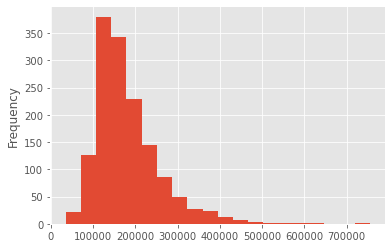

In [243]:
print(train_df['SalePrice'].describe())
train_df['SalePrice'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

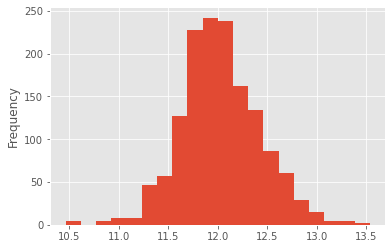

In [244]:
np.log(train_df['SalePrice']).plot.hist(bins=20)

In [245]:
train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])
train_X=train_df_le.drop(['SalePrice','SalePrice_log','Id'],axis=1)
train_Y=train_df_le['SalePrice_log']
models=[]
rmses=[]
#out of fold
oof=np.zeros(len(train_X))

for train_index,valid_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    y_train=train_Y.iloc[train_index]
    X_valid=train_X.iloc[valid_index]
    y_valid=train_Y.iloc[valid_index]
    
    lgb_train=lgb.Dataset(X_train,y_train)
    lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)
    
    model_lgb=lgb.train(lgbm_params,
                                        lgb_train,
                                        valid_sets=lgb_eval,
                                       num_boost_round=100,
                                       early_stopping_rounds=20,
                                       verbose_eval=10,
                                       )
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    tmp_rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[valid_index]=y_pred

<ipython-input-245-878ea1b9bf4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0436707
[20]	valid_0's l2: 0.0219638
[30]	valid_0's l2: 0.0178863
[40]	valid_0's l2: 0.0168272
[50]	valid_0's l2: 0.0165421
[60]	valid_0's l2: 0.0164067
[70]	valid_0's l2: 0.0163235
[80]	valid_0's l2: 0.0162611
[90]	valid_0's l2: 0.0162673
[100]	valid_0's l2: 0.0163207
Did not meet early stopping. Best iteration is:
[81]	valid_0's l2: 0.0162538
0.12749050377720023
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2985
[LightGB

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[90]	valid_0's l2: 0.020634
[100]	valid_0's l2: 0.0206411
Did not meet early stopping. Best iteration is:
[89]	valid_0's l2: 0.0206181
0.1435901195442448
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 75
[LightGBM] [Info] Start training from score 12.028565
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0390113
[20]	valid_0's l2: 0.0212181


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[30]	valid_0's l2: 0.0176641
[40]	valid_0's l2: 0.0167935
[50]	valid_0's l2: 0.016452
[60]	valid_0's l2: 0.0162947
[70]	valid_0's l2: 0.0161933
[80]	valid_0's l2: 0.0162265
[90]	valid_0's l2: 0.0162094
Early stopping, best iteration is:
[72]	valid_0's l2: 0.0161708
0.1271643059371225


欠損値の処理

In [246]:
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
categories=all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [247]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

欠損値が比較的高い(PoolQC,MiscFeature,Alley)を処理していく

In [248]:
all_df['PoolQC'].value_counts()
all_df.loc[~all_df['PoolQC'].isnull(),'PoolQC']=1
all_df.loc[all_df['PoolQC'].isnull(),'PoolQC']=0

In [249]:
#繰り返し処理
HighFacility_col=['PoolQC','MiscFeature','Alley']
for i in HighFacility_col:
    if all_df[i].dtype=='object':
        if len(all_df[all_df[i].isnull()])>0:
            all_df.loc[~all_df[i].isnull(),i]=1
            all_df.loc[all_df[i].isnull(),i]=0

In [250]:
#これらを所有している住宅は高い
all_df['hasHighFacility']=all_df['PoolQC']+all_df['MiscFeature']+all_df['Alley']
all_df['hasHighFacility']=all_df['hasHighFacility'].astype(int)
print(all_df['hasHighFacility'].value_counts())
all_df.drop(['PoolQC','MiscFeature','Alley'],axis=1)

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,6,2006,WD,Normal,NaN,0
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,4,2006,WD,Abnorml,NaN,0
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2006,WD,Abnorml,NaN,0
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,700,7,2006,WD,Normal,NaN,1


外れ値の除外

In [251]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [252]:
#数値データのみの抽出
train_df_num=train_df.select_dtypes(include=[np.number])
#比例尺度かを分ける
nonratio_features=['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold']
num_features=sorted(list(set(train_df_num)-set(nonratio_features)))

In [253]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [254]:
train_df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [255]:
train_df_num_rs=train_df_num[num_features]

In [256]:
#3/4分位数が0となる変数はなにか
for i in num_features:
    if train_df_num.describe()[i]['75%']==0:
        print(i,len(train_df_num_rs[train_df_num_rs[i]==0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [257]:
#HalfBathのように0,1,2で意味を持つものを探す
for i in num_features:
    if train_df_num_rs[i].nunique()<15:
        print(i,train_df_num_rs[i].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


外れ値の確認

In [258]:
#今回は平均値から標準偏差の±3倍の範囲に入っていないものを外れ値とみなす
for i in num_features:
    tmp_df=train_df_num_rs[(train_df_num_rs[i]>train_df_num_rs[i].mean()+train_df_num_rs[i].std()*3)|(train_df_num_rs[i]<train_df_num_rs[i].mean()-train_df_num_rs[i].std()*3)]
    print(i,len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

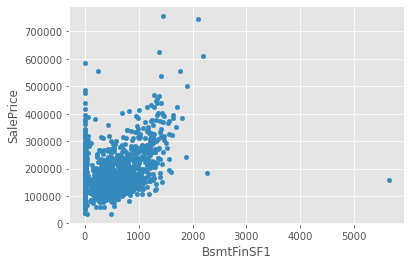

In [259]:
#外れ値を可視化してみる
all_df.plot.scatter(x='BsmtFinSF1',y='SalePrice')

In [260]:
#一つだけ明らかにおかしいデータが確認できる
all_df[all_df['BsmtFinSF1']>5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,...,1,NaN,0,0,1,2008,New,Partial,160000.0,1


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

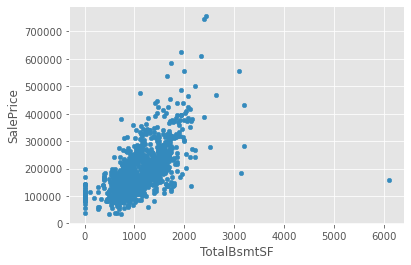

In [261]:
all_df.plot.scatter(x='TotalBsmtSF',y='SalePrice')

In [262]:
all_df[all_df['TotalBsmtSF']>6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,...,1,NaN,0,0,1,2008,New,Partial,160000.0,1


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

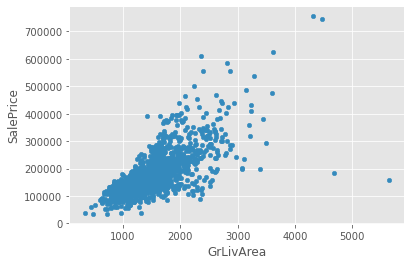

In [263]:
all_df.plot.scatter(x='GrLivArea',y='SalePrice')

In [264]:
all_df[all_df['GrLivArea']>5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,...,1,NaN,0,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,...,0,NaN,0,17000,10,2007,New,Partial,NaN,0


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

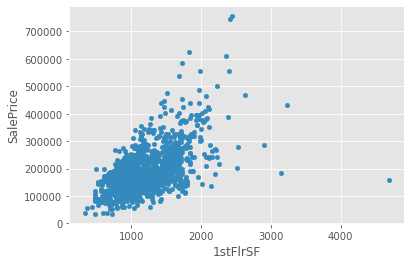

In [265]:
all_df.plot.scatter(x='1stFlrSF',y='SalePrice')

In [266]:
all_df[all_df['1stFlrSF']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,...,1,NaN,0,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,...,0,NaN,0,17000,10,2007,New,Partial,NaN,0


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

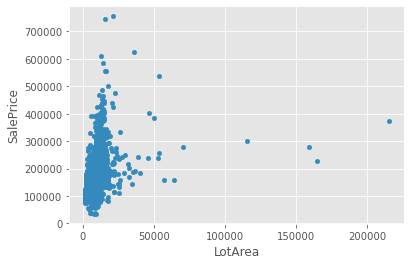

In [267]:
all_df.plot.scatter(x='LotArea',y='SalePrice')

In [268]:
all_df[all_df['LotArea']>100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
249,250,50,RL,NaN,159000,Pave,0,IR2,Low,AllPub,...,0,NaN,1,500,6,2007,WD,Normal,277000.0,1
313,314,20,RL,150.0,215245,Pave,0,IR3,Low,AllPub,...,0,NaN,0,0,6,2009,WD,Normal,375000.0,0
335,336,190,RL,NaN,164660,Grvl,0,IR1,HLS,AllPub,...,0,NaN,1,700,8,2008,WD,Normal,228950.0,1
706,707,20,RL,NaN,115149,Pave,0,IR2,Low,AllPub,...,0,NaN,0,0,6,2007,WD,Normal,302000.0,0


In [269]:
#これらを外れ値とみなしてもう一回学習してみる
all_df=all_df[(all_df['BsmtFinSF1']<2000)|(all_df['SalePrice'].isnull())]
all_df=all_df[(all_df['TotalBsmtSF']<3000)|(all_df['SalePrice'].isnull())]
all_df=all_df[(all_df['GrLivArea']<4500)|(all_df['SalePrice'].isnull())]
all_df=all_df[(all_df['1stFlrSF']<2500)|(all_df['SalePrice'].isnull())]
all_df=all_df[(all_df['LotArea']<100000)|(all_df['SalePrice'].isnull())]
#labelencoderを用いて値として振り分ける
for cat in categories:
    le=LabelEncoder()
    print(cat)
    all_df[cat].fillna('missing',inplace=True)
    le=le.fit(all_df[cat])
    all_df[cat]=le.transform(all_df[cat])
    all_df[cat]=all_df[cat].astype('category')
    


MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [270]:
#all_dfでテストデータと学習データに分ける
train_df_le=all_df[~all_df['SalePrice'].isnull()]
test_df_le=all_df[all_df['SalePrice'].isnull()]
train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])

train_X=train_df_le.drop(['SalePrice_log','SalePrice','Id'],axis=1)
train_Y=train_df_le['SalePrice_log']

<ipython-input-270-987bb462d550>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])


In [271]:
#all_dfでテストデータと学習データに分ける
train_df_le=all_df[~all_df['SalePrice'].isnull()]
test_df_le=all_df[all_df['SalePrice'].isnull()]
train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])

train_X=train_df_le.drop(['SalePrice_log','SalePrice','Id'],axis=1)
train_Y=train_df_le['SalePrice_log']
models=[]
rmses=[]
oof=np.zeros(len(train_X))

for train_index,valid_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    y_train=train_Y.iloc[train_index]
    X_valid=train_X.iloc[valid_index]
    y_valid=train_Y.iloc[valid_index]
    
    lgb_train=lgb.Dataset(X_train,y_train)
    lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)
    
    model_lgb=lgb.train(lgbm_params,
                                        lgb_train,
                                        valid_sets=lgb_eval,
                                       num_boost_round=100,
                                       early_stopping_rounds=20,
                                       verbose_eval=10,
                                       )
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    tmp_rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[valid_index]=y_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2955
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 74


<ipython-input-271-fd0bb82d752b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0423077
[20]	valid_0's l2: 0.0220026
[30]	valid_0's l2: 0.0175682
[40]	valid_0's l2: 0.0163798
[50]	valid_0's l2: 0.0162547
[60]	valid_0's l2: 0.0162622
[70]	valid_0's l2: 0.0162514
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161791
0.12719701309461987
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 74
[LightGBM] [Info] Start training from score 12.018820
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0467163
[20]	valid_0's l2: 0.026693
[30]	valid_0's l2: 0.0218666
[40]	valid_0's l2: 0.0201055
[50]	valid_0's

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


0.13794134404937303
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2993
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 75
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0370497
[20]	valid_0's l2: 0.0195352
[30]	valid_0's l2: 0.016412
[40]	valid_0's l2: 0.0155942


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[50]	valid_0's l2: 0.0151884
[60]	valid_0's l2: 0.0151752
[70]	valid_0's l2: 0.0153067
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0151274
0.12299343081439215


In [272]:
#特徴量を作成する
#築どれくらいか
all_df['Age']=all_df['YrSold']-all_df['YearBuilt']
all_df['TotalSF']=all_df['1stFlrSF']+all_df['2ndFlrSF']+all_df['TotalBsmtSF']
all_df['Total_bathrooms']=all_df['HalfBath']+all_df['BsmtFullBath']+all_df['FullBath']+all_df['BsmtHalfBath']
all_df['Total_PorchSF']=all_df['WoodDeckSF']+all_df['OpenPorchSF']+all_df['EnclosedPorch']+all_df['3SsnPorch']+all_df['ScreenPorch']

In [273]:
all_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [274]:
all_df['hasPorch']=all_df['Total_PorchSF'].apply(lambda x:1 if x>0 else 0)
all_df=all_df.drop('Total_PorchSF',axis=1)

In [275]:
train_df_le=all_df[~all_df['SalePrice'].isnull()]
test_df_le=all_df[all_df['SalePrice'].isnull()]
train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])

train_X=train_df_le.drop(['SalePrice_log','SalePrice','Id'],axis=1)
train_Y=train_df_le['SalePrice_log']#all_dfでテストデータと学習データに分ける
train_df_le=all_df[~all_df['SalePrice'].isnull()]
test_df_le=all_df[all_df['SalePrice'].isnull()]
train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])

train_X=train_df_le.drop(['SalePrice_log','SalePrice','Id'],axis=1)
train_Y=train_df_le['SalePrice_log']
models=[]
rmses=[]
oof=np.zeros(len(train_X))

for train_index,valid_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    y_train=train_Y.iloc[train_index]
    X_valid=train_X.iloc[valid_index]
    y_valid=train_Y.iloc[valid_index]
    
    lgb_train=lgb.Dataset(X_train,y_train)
    lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)
    
    model_lgb=lgb.train(lgbm_params,
                                        lgb_train,
                                        valid_sets=lgb_eval,
                                       num_boost_round=100,
                                       early_stopping_rounds=20,
                                       verbose_eval=10,
                                       )
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    tmp_rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[valid_index]=y_pred

<ipython-input-275-bbd146ece091>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])
<ipython-input-275-bbd146ece091>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Use

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3316
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0382198
[20]	valid_0's l2: 0.0195098
[30]	valid_0's l2: 0.0163133
[40]	valid_0's l2: 0.0155157
[50]	valid_0's l2: 0.0154576
[60]	valid_0's l2: 0.0155723
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0154265
0.12420330159076388
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 963, number of u

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3353
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 79
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0351087
[20]	valid_0's l2: 0.0182816
[30]	valid_0's l2: 0.0151312
[40]	valid_0's l2: 0.0142864
[50]	valid_0's l2: 0.014139
[60]	valid_0's l2: 0.0139937
[70]	valid_0's l2: 0.0141146
[80]	valid_0's l2: 0.0142578
Early stopping, best iteration is:
[60]	valid_0's l2: 0.0139937
0.11829506157249199


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


ハイパーパラメータの調整

In [276]:
import optuna 
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(train_X,train_Y,test_size=0.2,random_state=1,shuffle=False,stratify=None)

In [277]:
#optunaでハイパーパラメータの最適化にする

In [278]:
def objective(trial):
    params={
        'objective':'regression',
        'random_seed':1,
        'learning_rate':0.05,
        'n_estimators':1000,
        'num_leaves':trial.suggest_int('num_leaves',4,64),
        'max_bin':trial.suggest_int('max_bin',50,200),
        'bagging_fraction':trial.suggest_uniform('bagging_fraction',0.4,0.9),
        'bagging_freq':trial.suggest_int('bagging_freq',1,10),
        'feature_fraction':trial.suggest_uniform('feature_fraction',0.4,0.9),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf',2,16),
        'min_sum_hessian_in_leaf':trial.suggest_int('min_sum_hessian_in_leaf',1,10)
        }
    lgb_train=lgb.Dataset(X_train,y_train)
    lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)
    
    model_lgb=lgb.train(params,lgb_train,valid_sets=lgb_eval,num_boost_round=100,early_stopping_rounds=20,verbose_eval=10,)
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    score=np.sqrt(mean_squared_error(y_valid,y_pred))
    return score
study=optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective,n_trials=50)
study.best_params

[I 2021-05-29 16:45:42,275] A new study created in memory with name: no-name-2b678349-6467-4b13-8118-7f96a5dd6a6b
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066112
[20]	valid_0's l2: 0.0358312
[30]	valid_0's l2: 0.0243374
[40]	valid_0's l2: 0.0186921
[50]	valid_0's l2: 0.0161452
[60]	valid_0's l2: 0.0152372
[70]	valid_0's l2: 0.0147434
[80]	valid_0's l2: 0.0143121
[90]	valid_0's l2: 0.0140899
[100]	valid_0's l2: 0.0138953
[110]	valid_0's l2: 0.0137302
[120]	valid_0's l2: 0.0137974


[I 2021-05-29 16:45:42,613] Trial 0 finished with value: 0.11709168879420331 and parameters: {'num_leaves': 37, 'max_bin': 157, 'bagging_fraction': 0.7013816880358219, 'bagging_freq': 6, 'feature_fraction': 0.6118273996694523, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 0.11709168879420331.


[130]	valid_0's l2: 0.0138648
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0137105
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.0364509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2021-05-29 16:45:43,081] Trial 1 finished with value: 0.1224099560955158 and parameters: {'num_leaves': 58, 'max_bin': 195, 'bagging_fraction': 0.5917207594128888, 'bagging_freq': 8, 'feature_fraction': 0.6644474598764523, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11709168879420331.


No further splits with positive gain, best gain: -inf
[100]	valid_0's l2: 0.0150414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0150598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2021-05-29 16:45:43,315] Trial 2 finished with value: 0.12089606395459757 and parameters: {'num_leaves': 8, 'max_bin': 63, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 9, 'feature_fraction': 0.7890783754749253, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0

[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0737985
[20]	valid_0's l2: 0.0443445
[30]	valid_0's l2: 0.0307285
[40]	valid_0's l2: 0.0238324
[50]	valid_0's l2: 0.0198423
[60]	valid_0's l2: 0.0179076
[70]	valid_0's l2: 0.0165316
[80]	valid_0's l2: 0.0157311
[90]	valid_0's l2: 0.0153533
[100]	valid_0's l2: 0.0150737
[110]	valid_0's l2: 0.0148583
[120]	valid_0's l2: 0.0146742
[130]	valid_0's l2: 0.0148206
Early stopping, best iteration is:
[118]	valid_0's l2: 0.0146159
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2360
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0646095
[20]	valid_0's l2: 0.0351856
[30]	valid_0's l2: 0.0232922
[40]	valid_0's l2: 0.0187837
[50]	valid_0's l2: 0.016654
[60]	valid_0's l2: 0.0156615
[70]	valid_0's l2: 0.0152068
[80]	valid_0's l2: 0.0150416
[90]	valid_0's l2: 0.0149589
[100]	valid_0's l2: 0.0149428


[I 2021-05-29 16:45:43,854] Trial 3 finished with value: 0.12033738751715878 and parameters: {'num_leaves': 52, 'max_bin': 119, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 2, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11709168879420331.


[110]	valid_0's l2: 0.0148231
[120]	valid_0's l2: 0.0147271
[130]	valid_0's l2: 0.0146367
[140]	valid_0's l2: 0.0146509
[150]	valid_0's l2: 0.014567
[160]	valid_0's l2: 0.0145549
[170]	valid_0's l2: 0.0145029
[180]	valid_0's l2: 0.0145408
[190]	valid_0's l2: 0.0145144
Early stopping, best iteration is:
[171]	valid_0's l2: 0.0144811


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653044
[20]	valid_0's l2: 0.0356455
[30]	valid_0's l2: 0.0234678
[40]	valid_0's l2: 0.018572
[50]	valid_0's l2: 0.0162626
[60]	valid_0's l2: 0.0149227
[70]	valid_0's l2: 0.0145306
[80]	valid_0's l2: 0.014388
[90]	valid_0's l2: 0.0142742
[100]	valid_0's l2: 0.0141604
[110]	valid_0's l2: 0.0141386
[120]	valid_0's l2: 0.0139901
Early stopping, best iteration is:
[105]	valid_0's l2: 0.0139694


[I 2021-05-29 16:45:44,164] Trial 4 finished with value: 0.11819233699447233 and parameters: {'num_leaves': 35, 'max_bin': 112, 'bagging_fraction': 0.5322778060523135, 'bagging_freq': 8, 'feature_fraction': 0.6280751661082743, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2632
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653729
[20]	valid_0's l2: 0.0362112
[30]	valid_0's l2: 0.0247244
[40]	valid_0's l2: 0.019942
[50]	valid_0's l2: 0.0179378
[60]	valid_0's l2: 0.0172039
[70]	valid_0's l2: 0.0165661
[80]	valid_0's l2: 0.0161482
[90]	valid_0's l2: 0.0161726
[100]	valid_0's l2: 0.0161068
[110]	valid_0's l2: 0.0160101


[I 2021-05-29 16:45:44,598] Trial 5 finished with value: 0.12537541534213797 and parameters: {'num_leaves': 41, 'max_bin': 142, 'bagging_fraction': 0.7084669984373785, 'bagging_freq': 10, 'feature_fraction': 0.7409101495517417, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 0.11709168879420331.


[120]	valid_0's l2: 0.0158929
[130]	valid_0's l2: 0.0158931
[140]	valid_0's l2: 0.0159061
[150]	valid_0's l2: 0.0158572
[160]	valid_0's l2: 0.0157881
[170]	valid_0's l2: 0.0157329
[180]	valid_0's l2: 0.0157678
Early stopping, best iteration is:
[169]	valid_0's l2: 0.015719


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1506
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652928
[20]	valid_0's l2: 0.0356723
[30]	valid_0's l2: 0.0242239
[40]	valid_0's l2: 0.0195148
[50]	valid_0's l2: 0.0174827
[60]	valid_0's l2: 0.0165163
[70]	valid_0's l2: 0.0160701
[80]	valid_0's l2: 0.015786
[90]	valid_0's l2: 0.0157312


[I 2021-05-29 16:45:45,060] Trial 6 finished with value: 0.1240875074282777 and parameters: {'num_leaves': 46, 'max_bin': 59, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feature_fraction': 0.5051912805369205, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 4}. Best is trial 0 with value: 0.11709168879420331.


[100]	valid_0's l2: 0.0156892
[110]	valid_0's l2: 0.0155776
[120]	valid_0's l2: 0.0155287
[130]	valid_0's l2: 0.0155001
[140]	valid_0's l2: 0.0154368
[150]	valid_0's l2: 0.0154175
[160]	valid_0's l2: 0.0154197
[170]	valid_0's l2: 0.0154261
[180]	valid_0's l2: 0.0154141
Early stopping, best iteration is:
[163]	valid_0's l2: 0.0153977


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0677769
[20]	valid_0's l2: 0.0383804
[30]	valid_0's l2: 0.0249775
[40]	valid_0's l2: 0.0195515
[50]	valid_0's l2: 0.0171513
[60]	valid_0's l2: 0.016138
[70]	valid_0's l2: 0.0153318
[80]	valid_0's l2: 0.0149155
[90]	valid_0's l2: 0.014737
[100]	valid_0's l2: 0.0146851
[110]	valid_0's l2: 0.0147547
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0146443


[I 2021-05-29 16:45:45,355] Trial 7 finished with value: 0.1210134432501781 and parameters: {'num_leaves': 26, 'max_bin': 136, 'bagging_fraction': 0.6193007567311601, 'bagging_freq': 10, 'feature_fraction': 0.45102240537401406, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1965
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664427
[20]	valid_0's l2: 0.0364228
[30]	valid_0's l2: 0.0243733
[40]	valid_0's l2: 0.019146
[50]	valid_0's l2: 0.0169682
[60]	valid_0's l2: 0.0156594
[70]	valid_0's l2: 0.0152119
[80]	valid_0's l2: 0.0150967
[90]	valid_0's l2: 0.0148255
[100]	valid_0's l2: 0.0147015
[110]	valid_0's l2: 0.0146705


[I 2021-05-29 16:45:45,739] Trial 8 finished with value: 0.1208093588424179 and parameters: {'num_leaves': 43, 'max_bin': 88, 'bagging_fraction': 0.6331553864281532, 'bagging_freq': 3, 'feature_fraction': 0.4794847918227599, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 0 with value: 0.11709168879420331.


[120]	valid_0's l2: 0.0146258
[130]	valid_0's l2: 0.0146753
Early stopping, best iteration is:
[115]	valid_0's l2: 0.0145949
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0725723
[20]	valid_0's l2: 0.0415541
[30]	valid_0's l2: 0.0283229


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2021-05-29 16:45:46,081] Trial 9 finished with value: 0.11860981248136851 and parameters: {'num_leaves': 12, 'max_bin': 79, 'bagging_fraction': 0.5843625853304821, 'bagging_freq': 9, 'feature_fraction': 0.44855063789653066, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 1}. Best is trial 0 with value: 

[40]	valid_0's l2: 0.0219269
[50]	valid_0's l2: 0.0191497
[60]	valid_0's l2: 0.017441
[70]	valid_0's l2: 0.01606
[80]	valid_0's l2: 0.0156005
[90]	valid_0's l2: 0.0152415
[100]	valid_0's l2: 0.0149552
[110]	valid_0's l2: 0.0146459
[120]	valid_0's l2: 0.0145758
[130]	valid_0's l2: 0.0144689
[140]	valid_0's l2: 0.0144834
[150]	valid_0's l2: 0.0143453
[160]	valid_0's l2: 0.0142702
[170]	valid_0's l2: 0.0142738
[180]	valid_0's l2: 0.0141863
[190]	valid_0's l2: 0.0140828
[200]	valid_0's l2: 0.0141535
[210]	valid_0's l2: 0.0140851
Early stopping, best iteration is:
[191]	valid_0's l2: 0.0140683


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0643973
[20]	valid_0's l2: 0.0346954
[30]	valid_0's l2: 0.0238216
[40]	valid_0's l2: 0.0190475
[50]	valid_0's l2: 0.0173096
[60]	valid_0's l2: 0.0164926
[70]	valid_0's l2: 0.0161718
[80]	valid_0's l2: 0.0160613
[90]	valid_0's l2: 0.0158932
[100]	valid_0's l2: 0.0157559
[110]	valid_0's l2: 0.0156383
[120]	valid_0's l2: 0.0155632
[130]	valid_0's l2: 0.0155613
[140]	valid_0's l2: 0.0155078
[150]	valid_0's l2: 0.0155109
[160]	valid_0's l2: 0.0154767
[170]	valid_0's l2: 0.0154889
[180]	valid_0's l2: 0.0154823
Early stopping, best iteration is:
[162]	valid_0's l2: 0.015476

[I 2021-05-29 16:45:46,833] Trial 10 finished with value: 0.12440498930364163 and parameters: {'num_leaves': 63, 'max_bin': 120, 'bagging_fraction': 0.8883805440951686, 'bagging_freq': 7, 'feature_fraction': 0.7696317896991509, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0716674
[20]	valid_0's l2: 0.0409803
[30]	valid_0's l2: 0.0278853
[40]	valid_0's l2: 0.021656
[50]	valid_0's l2: 0.0188911
[60]	valid_0's l2: 0.0170282
[70]	valid_0's l2: 0.0159409
[80]	valid_0's l2: 0.0156444
[90]	valid_0's l2: 0.0151088
[100]	valid_0's l2: 0.0146575
[110]	valid_0's l2: 0.0146058
[120]	valid_0's l2: 0.0145191
[130]	valid_0's l2: 0.0142556
[140]	valid_0's l2: 0.0142655
[150]	valid_0's l2: 0.0142703
Early stopping, best iteration is:
[137]	valid_0's l2: 0.0141606


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0666662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.0369528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.0250576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2021-05-29 16:45:47,407] Trial 12 finished with value: 0.12201252806718696 and parameters: {'num_leaves': 38, 'max_bin': 90, 'bagging_fraction': 0.6616240267333499, 'bagging_freq': 1, 'feature_fraction': 0.6879732477780897, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 0 with value: 0.11709168879420331.


Early stopping, best iteration is:
[106]	valid_0's l2: 0.0148871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1671
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0665829
[20]	valid_0's l2: 0.0363697


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[30]	valid_0's l2: 0.0237724
[40]	valid_0's l2: 0.0184162
[50]	valid_0's l2: 0.0162061
[60]	valid_0's l2: 0.0152199
[70]	valid_0's l2: 0.014699
[80]	valid_0's l2: 0.0144247
[90]	valid_0's l2: 0.0142938
[100]	valid_0's l2: 0.0140872
[110]	valid_0's l2: 0.0140038
[120]	valid_0's l2: 0.0139394
[130]	valid_0's l2: 0.0138661
[140]	valid_0's l2: 0.0139697
Early stopping, best iteration is:
[127]	valid_0's l2: 0.0138566


[I 2021-05-29 16:45:47,815] Trial 13 finished with value: 0.11771404392274742 and parameters: {'num_leaves': 44, 'max_bin': 69, 'bagging_fraction': 0.7581636020592828, 'bagging_freq': 3, 'feature_fraction': 0.49159568100355844, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1350
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2021-05-29 16:45:48,322] Trial 14 finished with value: 0.11923034150221481 and parameters: {'num_leaves': 54, 'max_bin': 50, 'bagging_fraction': 0.7389082683981151, 'bagging_freq': 3, 'feature_fraction': 0.7675970110612975, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 3}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2596
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655351
[20]	valid_0's l2: 0.0364739
[30]	valid_0's l2: 0.0244806
[40]	valid_0's l2: 0.0192102
[50]	valid_0's l2: 0.0170903
[60]	valid_0's l2: 0.0162094
[70]	valid_0's l2: 0.0157427
[80]	valid_0's l2: 0.0156506
[90]	valid_0's l2: 0.0153794
[100]	valid_0's l2: 0.0153035
[110]	valid_0's l2: 0.0152294
[120]	valid_0's l2: 0.0151454
[130]	valid_0's l2: 0.015142
[140]	valid_0's l2: 0.0150554
[150]	valid_0's l2: 0.0150034
[160]	valid_0's l2: 0.0149622
[170]	valid_0's l2: 0.0149844
[180]	valid_0's l2: 0.014964
[190]	valid_0's l2: 0.0149777
[200]	valid_0's l2: 0.0148997
[210]

[I 2021-05-29 16:45:48,838] Trial 15 finished with value: 0.12203394953427521 and parameters: {'num_leaves': 39, 'max_bin': 139, 'bagging_fraction': 0.6861259528954367, 'bagging_freq': 3, 'feature_fraction': 0.8763745057584925, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 9}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2053
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0648783
[20]	valid_0's l2: 0.0356607
[30]	valid_0's l2: 0.0238151
[40]	valid_0's l2: 0.018788
[50]	valid_0's l2: 0.0164856
[60]	valid_0's l2: 0.0155185
[70]	valid_0's l2: 0.0152195
[80]	valid_0's l2: 0.0151125


[I 2021-05-29 16:45:49,243] Trial 16 finished with value: 0.12086125131443713 and parameters: {'num_leaves': 46, 'max_bin': 94, 'bagging_fraction': 0.8068989098512387, 'bagging_freq': 4, 'feature_fraction': 0.8405515985555808, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 0 with value: 0.11709168879420331.


[90]	valid_0's l2: 0.014805
[100]	valid_0's l2: 0.014763
[110]	valid_0's l2: 0.0146304
[120]	valid_0's l2: 0.014773
[130]	valid_0's l2: 0.0147365
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0146074
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2833
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0657921
[20]	valid_0's l2: 0.0362344
[30]	valid_0's l2: 0.0241694
[40]	valid_0's l2: 0.0192232
[50]	valid_0's l2: 0.0170964
[60]	valid_0's l2: 0.0160023
[70]	valid_0's l2: 0.0155804
[80]	valid_0's l2: 0.0151931
[90]	valid_0's l2: 0.0153671
[100]	valid_0's l2: 0.0150986
[110]	valid_0's l2: 0.0150407
[120]	valid_0's l2: 0.0151375


[I 2021-05-29 16:45:49,644] Trial 17 finished with value: 0.12257702871722245 and parameters: {'num_leaves': 46, 'max_bin': 159, 'bagging_fraction': 0.6506621909633512, 'bagging_freq': 10, 'feature_fraction': 0.7219950996148188, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 7}. Best is trial 0 with value: 0.11709168879420331.


Early stopping, best iteration is:
[109]	valid_0's l2: 0.0150251
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0773842
[20]	valid_0's l2: 0.0487799
[30]	valid_0's l2: 0.0345023
[40]	valid_0's l2: 0.0269087
[50]	valid_0's l2: 0.0230243
[60]	valid_0's l2: 0.0211309
[70]	valid_0's l2: 0.0196486
[80]	valid_0's l2: 0.0186684


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2021-05-29 16:45:49,982] Trial 18 finished with value: 0.11997158186874202 and parameters: {'num_leaves': 5, 'max_bin': 95, 'bagging_fraction': 0.7300867687463426, 'bagging_freq': 3, 'feature_fraction': 0.7090077144994208, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.

[90]	valid_0's l2: 0.0176252
[100]	valid_0's l2: 0.0170004
[110]	valid_0's l2: 0.0166795
[120]	valid_0's l2: 0.0163207
[130]	valid_0's l2: 0.0160107
[140]	valid_0's l2: 0.0156326
[150]	valid_0's l2: 0.0153231
[160]	valid_0's l2: 0.0152196
[170]	valid_0's l2: 0.0152406
[180]	valid_0's l2: 0.0151532
[190]	valid_0's l2: 0.0151034
[200]	valid_0's l2: 0.0150454
[210]	valid_0's l2: 0.015031
[220]	valid_0's l2: 0.0149398
[230]	valid_0's l2: 0.0148337
[240]	valid_0's l2: 0.0148289
[250]	valid_0's l2: 0.0146786
[260]	valid_0's l2: 0.0145433
[270]	valid_0's l2: 0.0144881
[280]	valid_0's l2: 0.0145014
[290]	valid_0's l2: 0.0144854
[300]	valid_0's l2: 0.0144057
[310]	valid_0's l2: 0.0143958
[320]	valid_0's l2: 0.0144414
[330]	valid_0's l2: 0.0144357
Early stopping, best iteration is:
[311]	valid_0's l2: 0.0143932


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0685117
[20]	valid_0's l2: 0.0386628
[30]	valid_0's l2: 0.0260128
[40]	valid_0's l2: 0.0199411
[50]	valid_0's l2: 0.0173636
[60]	valid_0's l2: 0.0161545
[70]	valid_0's l2: 0.0154074


[I 2021-05-29 16:45:50,382] Trial 19 finished with value: 0.12012964455989102 and parameters: {'num_leaves': 22, 'max_bin': 136, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 6, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 0.11709168879420331.


[80]	valid_0's l2: 0.0149391
[90]	valid_0's l2: 0.0147192
[100]	valid_0's l2: 0.0145535
[110]	valid_0's l2: 0.0144311
[120]	valid_0's l2: 0.0145426
[130]	valid_0's l2: 0.0145747
Early stopping, best iteration is:
[110]	valid_0's l2: 0.0144311
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0644737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2021-05-29 16:45:50,869] Trial 20 finished with value: 0.12084538415932437 and parameters: {'num_leaves': 58, 'max_bin': 105, 'bagging_fraction': 0.6179324626328134, 'bagging_freq': 9, 'feature_fraction': 0.8030969945230428, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.11709168879420331.


No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l2: 0.0149621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0148345
[LightGBM] [Warning] No further splits with positive gain, be

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2813
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0634718
[20]	valid_0's l2: 0.0344276
[30]	valid_0's l2: 0.0231576
[40]	valid_0's l2: 0.0189083
[50]	valid_0's l2: 0.0173361
[60]	valid_0's l2: 0.017065
[70]	valid_0's l2: 0.0167749
[80]	valid_0's l2: 0.0165231
[90]	valid_0's l2: 0.0164004
[100]	valid_0's l2: 0.0163161
[110]	valid_0's l2: 0.016257
[120]	valid_0's l2: 0.0162677
[130]	valid_0's l2: 0.0161944
[140]	valid_0's l2: 0.0161595
[150]	valid_0's l2: 0.0161136
[160]	valid_0's l2: 0.016088
[170]	valid_0's l2: 0.0160836
[180]	valid_0's l2: 0.0160647
[190]	valid_0's l2: 0.0160582
[200]	valid_0's l2: 0.0160479
[210]	

[I 2021-05-29 16:45:51,673] Trial 21 finished with value: 0.12654999246434426 and parameters: {'num_leaves': 60, 'max_bin': 157, 'bagging_fraction': 0.8994235032839333, 'bagging_freq': 2, 'feature_fraction': 0.8340630286841071, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0715311
[20]	valid_0's l2: 0.0412723
[30]	valid_0's l2: 0.0277006
[40]	valid_0's l2: 0.0220947
[50]	valid_0's l2: 0.0189634
[60]	valid_0's l2: 0.017198
[70]	valid_0's l2: 0.0161896
[80]	valid_0's l2: 0.0157471
[90]	valid_0's l2: 0.0151759
[100]	valid_0's l2: 0.0145582
[110]	valid_0's l2: 0.0144789
[120]	valid_0's l2: 0.0143505
[130]	valid_0's l2: 0.0142847
[140]	valid_0's l2: 0.0142224
[150]	valid_0's l2: 0.0141134
[160]	valid_0's l2: 0.0141574
[170]	valid_0's l2: 0.014101
[180]	valid_0's l2: 0.0141109
[190]	valid_0's l2: 0.0140421
[200]	valid_0's l2: 0.0139972
[210]

[I 2021-05-29 16:45:51,980] Trial 22 finished with value: 0.11821698050944374 and parameters: {'num_leaves': 11, 'max_bin': 178, 'bagging_fraction': 0.8036594793625054, 'bagging_freq': 6, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 0 with value: 0.11709168879420331.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2839
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0651723
[20]	valid_0's l2: 0.0368095
[30]	valid_0's l2: 0.0247133
[40]	valid_0's l2: 0.0198081
[50]	valid_0's l2: 0.0178822
[60]	valid_0's l2: 0.0171658
[70]	valid_0's l2: 0.0166407
[80]	valid_0's l2: 0.0165523
[90]	valid_0's l2: 0.0165725
[100]	valid_0's l2: 0.0164481
[110]	valid_0's l2: 0.0163594


[I 2021-05-29 16:45:52,307] Trial 23 finished with value: 0.1278117984351616 and parameters: {'num_leaves': 31, 'max_bin': 159, 'bagging_fraction': 0.8331911629643146, 'bagging_freq': 10, 'feature_fraction': 0.8279016711963055, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 4}. Best is trial 0 with value: 0.11709168879420331.


[120]	valid_0's l2: 0.0164649
Early stopping, best iteration is:
[104]	valid_0's l2: 0.0163359
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659143
[20]	valid_0's l2: 0.0354468


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[30]	valid_0's l2: 0.0230776
[40]	valid_0's l2: 0.0181756
[50]	valid_0's l2: 0.0161886
[60]	valid_0's l2: 0.0152324
[70]	valid_0's l2: 0.0147162
[80]	valid_0's l2: 0.0145469
[90]	valid_0's l2: 0.0144159
[100]	valid_0's l2: 0.0143757
[110]	valid_0's l2: 0.0142956
[120]	valid_0's l2: 0.0143421
[130]	valid_0's l2: 0.0141988
[140]	valid_0's l2: 0.014154
[150]	valid_0's l2: 0.014171
[160]	valid_0's l2: 0.0141693


[I 2021-05-29 16:45:52,786] Trial 24 finished with value: 0.11879114061161929 and parameters: {'num_leaves': 48, 'max_bin': 75, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feature_fraction': 0.49999826244820006, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 8}. Best is trial 0 with value: 0.11709168879420331.


Early stopping, best iteration is:
[147]	valid_0's l2: 0.0141113
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2164
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0695198
[20]	valid_0's l2: 0.0396438
[30]	valid_0's l2: 0.0264046
[40]	valid_0's l2: 0.0205153


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[50]	valid_0's l2: 0.0178086
[60]	valid_0's l2: 0.0161361
[70]	valid_0's l2: 0.0152951
[80]	valid_0's l2: 0.0147288
[90]	valid_0's l2: 0.0145088
[100]	valid_0's l2: 0.0143014
[110]	valid_0's l2: 0.0140935
[120]	valid_0's l2: 0.0139143
[130]	valid_0's l2: 0.0137792
[140]	valid_0's l2: 0.0136748
[150]	valid_0's l2: 0.0135904
[160]	valid_0's l2: 0.0135253
[170]	valid_0's l2: 0.0134898
[180]	valid_0's l2: 0.0134911
[190]	valid_0's l2: 0.0134531
[200]	valid_0's l2: 0.0134404
[210]	valid_0's l2: 0.0134206
[220]	valid_0's l2: 0.0134374
Early stopping, best iteration is:
[208]	valid_0's l2: 0.0134127


[I 2021-05-29 16:45:53,183] Trial 25 finished with value: 0.11581302013798973 and parameters: {'num_leaves': 17, 'max_bin': 102, 'bagging_fraction': 0.8640406467327955, 'bagging_freq': 8, 'feature_fraction': 0.41591946476565395, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 25 with value: 0.11581302013798973.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridde

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1917
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0650033
[20]	valid_0's l2: 0.0353911
[30]	valid_0's l2: 0.0238928
[40]	valid_0's l2: 0.0192668
[50]	valid_0's l2: 0.0171963
[60]	valid_0's l2: 0.0162612
[70]	valid_0's l2: 0.0158404
[80]	valid_0's l2: 0.0154741
[90]	valid_0's l2: 0.0152189
[100]	valid_0's l2: 0.0151652
[110]	valid_0's l2: 0.0152652
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0151058


[I 2021-05-29 16:45:53,492] Trial 26 finished with value: 0.12290552354396636 and parameters: {'num_leaves': 39, 'max_bin': 85, 'bagging_fraction': 0.867106998962397, 'bagging_freq': 7, 'feature_fraction': 0.6678164015124792, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 25 with value: 0.11581302013798973.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2257
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0665659
[20]	valid_0's l2: 0.0373296
[30]	valid_0's l2: 0.0251063
[40]	valid_0's l2: 0.0195637
[50]	valid_0's l2: 0.0167886
[60]	valid_0's l2: 0.0152399
[70]	valid_0's l2: 0.0144728
[80]	valid_0's l2: 0.0141467
[90]	valid_0's l2: 0.0140755
[100]	valid_0's l2: 0.0138154
[110]	valid_0's l2: 0.0137712
[120]	valid_0's l2: 0.0135359
[130]	valid_0's l2: 0.0135113
[140]	valid_0's l2: 0.0135166
[150]	valid_0's l2: 0.013529
Early stopping, best iteration is:
[139]	valid_0's l2: 0.01349


[I 2021-05-29 16:45:53,805] Trial 27 finished with value: 0.11614626797065475 and parameters: {'num_leaves': 23, 'max_bin': 110, 'bagging_fraction': 0.5049218744875611, 'bagging_freq': 2, 'feature_fraction': 0.8721861949919668, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 25 with value: 0.11581302013798973.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridde

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0705821
[20]	valid_0's l2: 0.0400156
[30]	valid_0's l2: 0.0265621
[40]	valid_0's l2: 0.0210273
[50]	valid_0's l2: 0.0183642
[60]	valid_0's l2: 0.0170631
[70]	valid_0's l2: 0.0159036
[80]	valid_0's l2: 0.0150115
[90]	valid_0's l2: 0.014699
[100]	valid_0's l2: 0.0143338
[110]	valid_0's l2: 0.0142563
[120]	valid_0's l2: 0.0140359
[130]	valid_0's l2: 0.0139258
[140]	valid_0's l2: 0.0138008
[150]	valid_0's l2: 0.0137256
[160]	valid_0's l2: 0.0135384
[170]	valid_0's l2: 0.0137376
[180]	valid_0's l2: 0.0139694
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0135384

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1402
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0701259
[20]	valid_0's l2: 0.039503
[30]	valid_0's l2: 0.02677
[40]	valid_0's l2: 0.0207671
[50]	valid_0's l2: 0.0177127
[60]	valid_0's l2: 0.0161007
[70]	valid_0's l2: 0.0152309
[80]	valid_0's l2: 0.0146343
[90]	valid_0's l2: 0.0143344
[100]	valid_0's l2: 0.0141541
[110]	valid_0's l2: 0.0140563
[120]	valid_0's l2: 0.0138399
[130]	valid_0's l2: 0.0138138
[140]	valid_0's l2: 0.013694
[150]	valid_0's l2: 0.0136851
[160]	valid_0's l2: 0.0136171
[170]	valid_0's l2: 0.0137429
[180]	valid_0's l2: 0.0135701
[19

[I 2021-05-29 16:45:54,429] Trial 29 finished with value: 0.1139825384819567 and parameters: {'num_leaves': 14, 'max_bin': 53, 'bagging_fraction': 0.4336248157316243, 'bagging_freq': 7, 'feature_fraction': 0.6268484222780226, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 29 with value: 0.1139825384819567.


[260]	valid_0's l2: 0.0130522
[270]	valid_0's l2: 0.0129995
[280]	valid_0's l2: 0.0132077
Early stopping, best iteration is:
[266]	valid_0's l2: 0.012992
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1869
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.067692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2021-05-29 16:45:54,991] Trial 30 finished with value: 0.11559329920286136 and parameters: {'num_leaves': 64, 'max_bin': 82, 'bagging_fraction': 0.7315391015500504, 'bagging_freq': 3, 'feature_fraction': 0.41032549973286436, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2584
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0665952
[20]	valid_0's l2: 0.0374907
[30]	valid_0's l2: 0.0256762
[40]	valid_0's l2: 0.0208223
[50]	valid_0's l2: 0.018588
[60]	valid_0's l2: 0.0176016
[70]	valid_0's l2: 0.01725
[80]	valid_0's l2: 0.0168703
[90]	valid_0's l2: 0.0166456
[100]	valid_0's l2: 0.0165975
[110]	valid_0's l2: 0.0163187
[120]	valid_0's l2: 0.0161303
[130]	valid_0's l2: 0.0162196
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0161019


[I 2021-05-29 16:45:55,314] Trial 31 finished with value: 0.12689315506237359 and parameters: {'num_leaves': 27, 'max_bin': 138, 'bagging_fraction': 0.8155242276180952, 'bagging_freq': 7, 'feature_fraction': 0.8363253277236977, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3087
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0695742
[20]	valid_0's l2: 0.0404596
[30]	valid_0's l2: 0.027132
[40]	valid_0's l2: 0.0210263
[50]	valid_0's l2: 0.0187532
[60]	valid_0's l2: 0.0175698
[70]	valid_0's l2: 0.0169238
[80]	valid_0's l2: 0.0167261
[90]	valid_0's l2: 0.0163777
[100]	valid_0's l2: 0.0161183
[110]	valid_0's l2: 0.0161224
[120]	valid_0's l2: 0.0160377
[130]	valid_0's l2: 0.0159965


[I 2021-05-29 16:45:55,693] Trial 32 finished with value: 0.12595584388591552 and parameters: {'num_leaves': 15, 'max_bin': 193, 'bagging_fraction': 0.7437441381939076, 'bagging_freq': 3, 'feature_fraction': 0.8736852952444621, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 29 with value: 0.1139825384819567.


[140]	valid_0's l2: 0.0159536
[150]	valid_0's l2: 0.0159134
[160]	valid_0's l2: 0.0158979
[170]	valid_0's l2: 0.0159235
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0158649
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2465
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0684239
[20]	valid_0's l2: 0.0380162


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2021-05-29 16:45:56,001] Trial 33 finished with value: 0.11850752347299554 and parameters: {'num_leaves': 17, 'max_bin': 128, 'bagging_fraction': 0.4128313590272658, 'bagging_freq': 3, 'feature_fraction': 0.6123427343757532, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 29 with value:

[30]	valid_0's l2: 0.0255356
[40]	valid_0's l2: 0.0197557
[50]	valid_0's l2: 0.0168972
[60]	valid_0's l2: 0.0155385
[70]	valid_0's l2: 0.0149045
[80]	valid_0's l2: 0.0146929
[90]	valid_0's l2: 0.0145228
[100]	valid_0's l2: 0.014227
[110]	valid_0's l2: 0.0141971
[120]	valid_0's l2: 0.0141552
[130]	valid_0's l2: 0.0142129
Early stopping, best iteration is:
[117]	valid_0's l2: 0.014044


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2586
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.06711
[20]	valid_0's l2: 0.0382461
[30]	valid_0's l2: 0.0250724
[40]	valid_0's l2: 0.0198309
[50]	valid_0's l2: 0.0174069
[60]	valid_0's l2: 0.0161247
[70]	valid_0's l2: 0.015737
[80]	valid_0's l2: 0.015521
[90]	valid_0's l2: 0.0152819
[100]	valid_0's l2: 0.0151635
[110]	valid_0's l2: 0.0151548
[120]	valid_0's l2: 0.0151487
Early stopping, best iteration is:
[103]	valid_0's l2: 0.0151351


[I 2021-05-29 16:45:56,313] Trial 34 finished with value: 0.12302471097836441 and parameters: {'num_leaves': 20, 'max_bin': 138, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 2, 'feature_fraction': 0.6586895535770572, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.067505
[20]	valid_0's l2: 0.0371791
[30]	valid_0's l2: 0.0255477
[40]	valid_0's l2: 0.0200582
[50]	valid_0's l2: 0.0174392
[60]	valid_0's l2: 0.015759
[70]	valid_0's l2: 0.0149427
[80]	valid_0's l2: 0.0145882
[90]	valid_0's l2: 0.0145389
[100]	valid_0's l2: 0.0144739
[110]	valid_0's l2: 0.0144795
[120]	valid_0's l2: 0.0145012
Early stopping, best iteration is:
[106]	valid_0's l2: 0.0144171


[I 2021-05-29 16:45:56,614] Trial 35 finished with value: 0.1200710705859647 and parameters: {'num_leaves': 28, 'max_bin': 135, 'bagging_fraction': 0.49163991810703933, 'bagging_freq': 2, 'feature_fraction': 0.6440281403244773, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0648066
[20]	valid_0's l2: 0.0347909
[30]	valid_0's l2: 0.0238584
[40]	valid_0's l2: 0.0194201
[50]	valid_0's l2: 0.017115
[60]	valid_0's l2: 0.0163958
[70]	valid_0's l2: 0.0159401
[80]	valid_0's l2: 0.0157423
[90]	valid_0's l2: 0.0154587
[100]	valid_0's l2: 0.0153576


[I 2021-05-29 16:45:57,010] Trial 36 finished with value: 0.12348420785186123 and parameters: {'num_leaves': 50, 'max_bin': 163, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feature_fraction': 0.6760962349612033, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.1139825384819567.


[110]	valid_0's l2: 0.0152822
[120]	valid_0's l2: 0.0152595
[130]	valid_0's l2: 0.0152694
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0152483
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1934
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0677297
[20]	valid_0's l2: 0.0384307
[30]	valid_0's l2: 0.0260619
[40]	valid_0's l2: 0.0206074
[50]	valid_0's l2: 0.0178057
[60]	valid_0's l2: 0.0164165
[70]	valid_0's l2: 0.0157652
[80]	valid_0's l2: 0.015478
[90]	valid_0's l2: 0.0153015
[100]	valid_0's l2: 0.0152189
[110]	valid_0's l2: 0.0150827
[120]	valid_0's l2: 0.0150014
[130]	valid_0's l2: 0.0150091
[140]	valid_0's l2: 0.0151548
Early stopping, best iteration is:
[126]	valid_0's l2: 0.0149528


[I 2021-05-29 16:45:57,346] Trial 37 finished with value: 0.12228148190446468 and parameters: {'num_leaves': 21, 'max_bin': 86, 'bagging_fraction': 0.45014697113274893, 'bagging_freq': 1, 'feature_fraction': 0.8647646583960953, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2584
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0671736
[20]	valid_0's l2: 0.0385863
[30]	valid_0's l2: 0.0260726
[40]	valid_0's l2: 0.021212
[50]	valid_0's l2: 0.018297
[60]	valid_0's l2: 0.0171304
[70]	valid_0's l2: 0.0159825
[80]	valid_0's l2: 0.0152927
[90]	valid_0's l2: 0.0151871
[100]	valid_0's l2: 0.0145784
[110]	valid_0's l2: 0.0145572
[120]	valid_0's l2: 0.0143714
[130]	valid_0's l2: 0.01433
[140]	valid_0's l2: 0.0143718
[150]	valid_0's l2: 0.0141348
[160]	valid_0's l2: 0.0139222
[170]	valid_0's l2: 0.0141576
[180]	valid_0's l2: 0.0141776
Early stopping, best iteration is:
[164]	valid_0's l2: 0.0139141


[I 2021-05-29 16:45:57,656] Trial 38 finished with value: 0.1179581352823282 and parameters: {'num_leaves': 21, 'max_bin': 138, 'bagging_fraction': 0.4319776330604906, 'bagging_freq': 5, 'feature_fraction': 0.8887475698722234, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1902
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0647815
[20]	valid_0's l2: 0.0350663
[30]	valid_0's l2: 0.0229678
[40]	valid_0's l2: 0.0184403
[50]	valid_0's l2: 0.0167226
[60]	valid_0's l2: 0.0161639
[70]	valid_0's l2: 0.0157727
[80]	valid_0's l2: 0.0153911
[90]	valid_0's l2: 0.0152535


[I 2021-05-29 16:45:58,075] Trial 39 finished with value: 0.122655213820749 and parameters: {'num_leaves': 62, 'max_bin': 84, 'bagging_fraction': 0.8746594112078407, 'bagging_freq': 10, 'feature_fraction': 0.7996012936761958, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 29 with value: 0.1139825384819567.


[100]	valid_0's l2: 0.0150921
[110]	valid_0's l2: 0.015072
[120]	valid_0's l2: 0.015161
Early stopping, best iteration is:
[108]	valid_0's l2: 0.0150443
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0674423
[20]	valid_0's l2: 0.0380608
[30]	valid_0's l2: 0.0257726
[40]	valid_0's l2: 0.020105
[50]	valid_0's l2: 0.0174161
[60]	valid_0's l2: 0.0162269
[70]	valid_0's l2: 0.0154334
[80]	valid_0's l2: 0.0151859
[90]	valid_0's l2: 0.014964


[I 2021-05-29 16:45:58,492] Trial 40 finished with value: 0.12146834371539586 and parameters: {'num_leaves': 21, 'max_bin': 178, 'bagging_fraction': 0.7089383459587619, 'bagging_freq': 1, 'feature_fraction': 0.5736167589661099, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.1139825384819567.


[100]	valid_0's l2: 0.0147806
[110]	valid_0's l2: 0.0148491
[120]	valid_0's l2: 0.0148896
Early stopping, best iteration is:
[103]	valid_0's l2: 0.0147546
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0688368
[20]	valid_0's l2: 0.0382175


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[30]	valid_0's l2: 0.0251466
[40]	valid_0's l2: 0.019231
[50]	valid_0's l2: 0.0164918
[60]	valid_0's l2: 0.0151437
[70]	valid_0's l2: 0.0145079
[80]	valid_0's l2: 0.0142292
[90]	valid_0's l2: 0.0140064
[100]	valid_0's l2: 0.0139282
[110]	valid_0's l2: 0.0137455
[120]	valid_0's l2: 0.0136504
[130]	valid_0's l2: 0.0135968
[140]	valid_0's l2: 0.0135474
[150]	valid_0's l2: 0.0136236
Early stopping, best iteration is:
[136]	valid_0's l2: 0.0135373


[I 2021-05-29 16:45:58,882] Trial 41 finished with value: 0.11635009906529324 and parameters: {'num_leaves': 33, 'max_bin': 125, 'bagging_fraction': 0.7197362581993618, 'bagging_freq': 4, 'feature_fraction': 0.4684501358427995, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 2}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1882
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2021-05-29 16:45:59,233] Trial 42 finished with value: 0.12891487828192247 and parameters: {'num_leaves': 35, 'max_bin': 83, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feature_fraction': 0.8864597445115652, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.1139825384819567.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0167145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[93]	valid_0's l2: 0.016619
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0648898
[20]	valid_0's l2: 0.0354192
[30]	valid_0's l2: 0.0231528
[40]	valid_0's l2: 0.0186453
[50]	valid_0's l2: 0.0168069
[60]	valid_0's l2: 0.0163038
[70]	valid_0's l2: 0.0158657
[80]	valid_0's l2: 0.0154702
[90]	valid_0's l2: 0.0156147
[100]	valid_0's l2: 0.015595
Early stopping, best iteration is:
[80]	valid_0's l2: 0.0154702


[I 2021-05-29 16:45:59,594] Trial 43 finished with value: 0.12437929683214434 and parameters: {'num_leaves': 51, 'max_bin': 100, 'bagging_fraction': 0.4405506949939984, 'bagging_freq': 5, 'feature_fraction': 0.5161170710854714, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 1}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0665888
[20]	valid_0's l2: 0.0366043
[30]	valid_0's l2: 0.0246221
[40]	valid_0's l2: 0.0195232
[50]	valid_0's l2: 0.0174573
[60]	valid_0's l2: 0.0162783
[70]	valid_0's l2: 0.0157923
[80]	valid_0's l2: 0.0155589
[90]	valid_0's l2: 0.0153451
[100]	valid_0's l2: 0.0152851


[I 2021-05-29 16:45:59,926] Trial 44 finished with value: 0.12343605757680343 and parameters: {'num_leaves': 48, 'max_bin': 51, 'bagging_fraction': 0.7852903742513881, 'bagging_freq': 2, 'feature_fraction': 0.4397610412933779, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 29 with value: 0.1139825384819567.


[110]	valid_0's l2: 0.015313
Early stopping, best iteration is:
[94]	valid_0's l2: 0.0152365
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0693299
[20]	valid_0's l2: 0.0397651
[30]	valid_0's l2: 0.0264413


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2021-05-29 16:46:00,228] Trial 45 finished with value: 0.12577667069315138 and parameters: {'num_leaves': 18, 'max_bin': 113, 'bagging_fraction': 0.6786843956619585, 'bagging_freq': 9, 'feature_fraction': 0.7635221313556642, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 2}. Best is trial 29 with value:

[40]	valid_0's l2: 0.0205184
[50]	valid_0's l2: 0.0181857
[60]	valid_0's l2: 0.0171964
[70]	valid_0's l2: 0.0162608
[80]	valid_0's l2: 0.0161029
[90]	valid_0's l2: 0.0159553
[100]	valid_0's l2: 0.0158322
[110]	valid_0's l2: 0.0158672
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0158198


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2021-05-29 16:46:00,449] Trial 46 finished with value: 0.12363080275300058 and parameters: {'num_leaves': 7, 'max_bin': 95, 'bagging_fraction': 0.5310590746198391, 'bagging_freq': 5, 'feature_fraction': 0.7416406677738403, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 29 with value: 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0751709
[20]	valid_0's l2: 0.0458543
[30]	valid_0's l2: 0.0316162
[40]	valid_0's l2: 0.0247898
[50]	valid_0's l2: 0.0212443
[60]	valid_0's l2: 0.0193685
[70]	valid_0's l2: 0.0178343
[80]	valid_0's l2: 0.0170284
[90]	valid_0's l2: 0.0164196
[100]	valid_0's l2: 0.0158217
[110]	valid_0's l2: 0.0154685
[120]	valid_0's l2: 0.0152846
[130]	valid_0's l2: 0.015401
[140]	valid_0's l2: 0.0153028
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0152846


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0668232
[20]	valid_0's l2: 0.0367312
[30]	valid_0's l2: 0.0244585
[40]	valid_0's l2: 0.0194233
[50]	valid_0's l2: 0.0169564
[60]	valid_0's l2: 0.0159121
[70]	valid_0's l2: 0.0152162
[80]	valid_0's l2: 0.0148101
[90]	valid_0's l2: 0.0145864
[100]	valid_0's l2: 0.0145055
[110]	valid_0's l2: 0.0143454
[120]	valid_0's l2: 0.0143128
[130]	valid_0's l2: 0.0142986
[140]	valid_0's l2: 0.0142957


[I 2021-05-29 16:46:00,786] Trial 47 finished with value: 0.11937500369437778 and parameters: {'num_leaves': 27, 'max_bin': 77, 'bagging_fraction': 0.7942727561532594, 'bagging_freq': 1, 'feature_fraction': 0.7484986208624937, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.1139825384819567.


[150]	valid_0's l2: 0.0143089
Early stopping, best iteration is:
[132]	valid_0's l2: 0.0142504
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2204
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0675298
[20]	valid_0's l2: 0.0384343


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[30]	valid_0's l2: 0.0254052
[40]	valid_0's l2: 0.0198718
[50]	valid_0's l2: 0.0173264
[60]	valid_0's l2: 0.0161945
[70]	valid_0's l2: 0.0155777
[80]	valid_0's l2: 0.0151998
[90]	valid_0's l2: 0.0150084
[100]	valid_0's l2: 0.0148058
[110]	valid_0's l2: 0.0146139
[120]	valid_0's l2: 0.0145532
[130]	valid_0's l2: 0.0145706
[140]	valid_0's l2: 0.0145347
[150]	valid_0's l2: 0.0144988
[160]	valid_0's l2: 0.0144318
[170]	valid_0's l2: 0.0144116
Early stopping, best iteration is:
[156]	valid_0's l2: 0.0143918


[I 2021-05-29 16:46:01,148] Trial 48 finished with value: 0.11996596184536257 and parameters: {'num_leaves': 19, 'max_bin': 106, 'bagging_fraction': 0.6937998175981945, 'bagging_freq': 3, 'feature_fraction': 0.5854263996089444, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 29 with value: 0.1139825384819567.
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2946
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0760624
[20]	valid_0's l2: 0.0463878
[30]	valid_0's l2: 0.0326249
[40]	valid_0's l2: 0.0255969
[50]	valid_0's l2: 0.0217047
[60]	valid_0's l2: 0.0195014
[70]	valid_0's l2: 0.0182544
[80]	valid_0's l2: 0.0170541
[90]	valid_0's l2: 0.0162941
[100]	valid_0's l2: 0.0156349
[110]	valid_0's l2: 0.0153056
[120]	valid_0's l2: 0.0150079
[130]	valid_0's l2: 0.0148343
[140]	valid_0's l2: 0.0146791
[150]	valid_0's l2: 0.0145108
[160]	valid_0's l2: 0.0144783
[170]	valid_0's l2: 0.0143329
[180]	valid_0's l2: 0.014189


{'num_leaves': 14,
 'max_bin': 53,
 'bagging_fraction': 0.4336248157316243,
 'bagging_freq': 7,
 'feature_fraction': 0.6268484222780226,
 'min_data_in_leaf': 10,
 'min_sum_hessian_in_leaf': 9}

最適化で得られた
{'num_leaves': 14,
 'max_bin': 53,
 'bagging_fraction': 0.4336248157316243,
 'bagging_freq': 7,
 'feature_fraction': 0.6268484222780226,
 'min_data_in_leaf': 10,
 'min_sum_hessian_in_leaf': 9}
 をハイパーパラメータと設定してクロスバリデーションで学習して精度を確認する

In [279]:
lgbm_params={
    'objective':'regression',
     'random_seed':1,
    'learning_rate':0.05,
    'n_estimators':1000,
    'num_leaves': 14,
     'max_bin': 53,
     'bagging_fraction': 0.4336248157316243,
     'bagging_freq': 7,
     'feature_fraction': 0.6268484222780226,
     'min_data_in_leaf': 10,
     'min_sum_hessian_in_leaf': 9,
}

train_df_le=all_df[~all_df['SalePrice'].isnull()]
test_df_le=all_df[all_df['SalePrice'].isnull()]
train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])

train_X=train_df_le.drop(['SalePrice_log','SalePrice','Id'],axis=1)
train_Y=train_df_le['SalePrice_log']
models=[]
rmses=[]
oof=np.zeros(len(train_X))

for train_index,valid_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    y_train=train_Y.iloc[train_index]
    X_valid=train_X.iloc[valid_index]
    y_valid=train_Y.iloc[valid_index]
    
    lgb_train=lgb.Dataset(X_train,y_train)
    lgb_eval=lgb.Dataset(X_valid,y_valid,reference=lgb_train)
    
    model_lgb=lgb.train(lgbm_params,
                                        lgb_train,
                                        valid_sets=lgb_eval,
                                       num_boost_round=100,
                                       early_stopping_rounds=20,
                                       verbose_eval=10,
                                       )
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    tmp_rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[valid_index]=y_pred

<ipython-input-279-1f485009cee1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le['SalePrice_log']=np.log(train_df_le['SalePrice'])
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is ov

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 80
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0753107
[20]	valid_0's l2: 0.0405643
[30]	valid_0's l2: 0.0253644
[40]	valid_0's l2: 0.0196738
[50]	valid_0's l2: 0.0165901
[60]	valid_0's l2: 0.0149913
[70]	valid_0's l2: 0.014372
[80]	valid_0's l2: 0.0137691
[90]	valid_0's l2: 0.0135523
[100]	valid_0's l2: 0.013228
[110]	valid_0's l2: 0.0131017
[120]	valid_0's l2: 0.0129999
[130]	valid_0's l2: 0.0129063
[140]	valid_0's l2: 0.0129918
[150]	valid_0's l2: 0.0131357
Early stopping, best iteration is:
[130]	valid_0's l2: 0.0129063
0.1136061008790206
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhea

/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


0.1383505671465729
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1384
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 80
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664593
[20]	valid_0's l2: 0.0373112
[30]	valid_0's l2: 0.025918
[40]	valid_0's l2: 0.0198173
[50]	valid_0's l2: 0.0173625
[60]	valid_0's l2: 0.0161532
[70]	valid_0's l2: 0.0151996
[80]	valid_0's l2: 0.0146569
[90]	valid_0's l2: 0.0143918
[100]	valid_0's l2: 0.0140879
[110]	valid_0's l2: 0.013549
[120]	valid_0's l2: 0.0135805
[130]	valid_0's l2: 0.0135464
[140]	valid_0's l2: 0.0134846
[150]	valid_0's l2: 0.0136527
Early stopping, best iteration is:
[136]	valid_0's l2: 0.0134071


/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/Users/junyakuramochi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


0.1157888940351014


In [280]:
test_X=test_df_le.drop(['SalePrice','Id'],axis=1)
preds=[]
for model in models:
    pred=model.predict(test_X)
    preds.append(pred)
preds_array=np.array(preds)
pred_mean=np.mean(preds_array,axis=0)
preds_exp=np.exp(pred_mean)
submission['SalePrice']=preds_exp
submission.to_csv('/Users/junyakuramochi/Downloads/kaggle_HousePrices/output/kaggle_HousePrice_submission.csv',index=False
                 )